In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

plt.rc('figure', facecolor='w')
plt.rc('font', size=11)

In [2]:
df = pd.read_fwf('data/features_full_100ns_ca.dat', widths=(6,3,9,) + (13,) * 32)
LAST_CLOSED = len(df) // 2
BLOCK = len(df) // 2

In [3]:
ang_column_map = {f'{ang}:{i}':f'{ang}_{i+1}' 
                  for ang in ('phi', 'psi') for i in range(175,189)}
df.rename(columns=ang_column_map, inplace=True)

In [4]:
def block_to_continuous(block):
    result = block[:1]
    ref = result[0]
    ref = 1000
    for value in block:
        if abs(value) < ref:
            ref = value
    for value in block[1:]:
        diff = value - ref
        result.append(value - 360 * round(diff / 360))
    return result

def block_to_continuous(block):
    data = np.array(block)
    max_density_value = np.mean(data)
    return list(data - 360 * np.round((data - max_density_value) / 360))
    

def ang_to_continuous(values):
    result = []
    for i in range(len(values) // BLOCK):
        result.extend(block_to_continuous(values[BLOCK * i: BLOCK * (i+1)]))
    return result

In [5]:
for column in df.columns[5:]:
    df[column] = ang_to_continuous(list(df[column]))

In [6]:
df_closed = df.iloc[:LAST_CLOSED,:]
df_open = df.iloc[LAST_CLOSED:,:]

In [34]:
POINT_SIZE = 1.
LINE_WIDTH = 0.5


def plot_s1a(ax):
    ax.scatter(df_closed['CC_closed'], df_closed['CC_open'], 
               s=POINT_SIZE, linewidths=LINE_WIDTH, c='red')
    ax.scatter(df_open['CC_closed'], df_open['CC_open'], 
               s=POINT_SIZE, linewidths=LINE_WIDTH, c='blue')
    ax.set_xlabel('$d_1\ (\AA)$', labelpad=-2)
    ax.set_ylabel('$d_2\ (\AA)$')
    

def plot_s1b(ax):
    ax.scatter(df_closed['CC_closed'] - df_closed['CC_open'], df_closed['phi_182'], 
               s=POINT_SIZE, linewidths=LINE_WIDTH, c='red')
    ax.scatter(df_open['CC_closed'] - df_open['CC_open'], df_open['phi_182'], 
               s=POINT_SIZE, linewidths=LINE_WIDTH, c='blue')
    ax.set_xlabel('$d_1-d_2\ (\AA)$', labelpad=-2)
    ax.set_ylabel('$\Phi 182$ ($\degree$)')

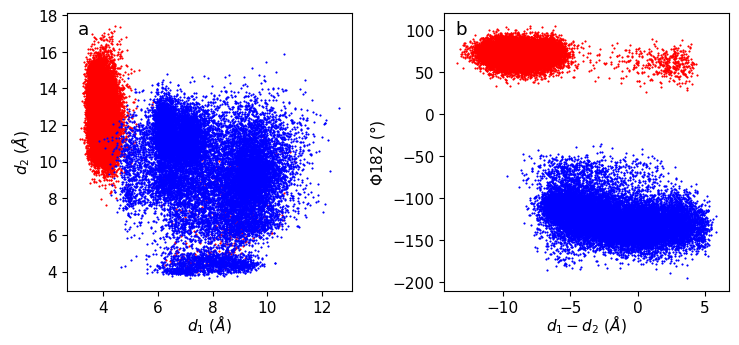

In [35]:
fig, axs = plt.subplot_mosaic([['a', 'b']], figsize=(8, 4))
fig.tight_layout(pad=3)
plot_s1a(axs['a'])
plot_s1b(axs['b'])

for label, ax in axs.items():
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(-0.01, 1.0, label, transform=ax.transAxes + trans, verticalalignment='top', fontsize='large')

plt.savefig('FigS1.png', dpi=300, bbox_inches='tight')
plt.show()